<a href="https://colab.research.google.com/github/ozdemrburak/Nutrition_Assistant_using_Deep_Learning/blob/main/Siglip2_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zygmuntyt/nutrition5k-dataset-side-angle-images")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'nutrition5k-dataset-side-angle-images' dataset.
Path to dataset files: /kaggle/input/nutrition5k-dataset-side-angle-images


In [ ]:
import os

if 'path' in locals():
    dish_directories = []
    print(f"Starting traversal from: {path}")
    for dirname, _, _ in os.walk(path):
        if os.path.basename(dirname).startswith('dish_'):
            dish_directories.append(dirname)

    print("Directories starting with 'dish_':")
    #for dish_dir in dish_directories:
        #print(dish_dir)

    print(f"\nTotal number of directories starting with 'dish_': {len(dish_directories)}")

else:
    print("The 'path' variable is not defined. Please run the previous cell first.")

Starting traversal from: /kaggle/input/nutrition5k-dataset-side-angle-images
Directories starting with 'dish_':

Total number of directories starting with 'dish_': 4793


# Besin değerleri

- Datasete gerekli ön işlemeler ve incelemeler yapıldı.



In [1]:
import pandas as pd

df = pd.read_excel("/content/dish_ingredients.xlsx")
df.head()

dish_id          ingr_id   ingr_name     grams   calories  \
0  dish_1561662216  ingr_0000000508   soy sauce  3.398568   1.801241   
1  dish_1561662216  ingr_0000000122      garlic  2.124105   3.164916   
2  dish_1561662216  ingr_0000000026  white rice  8.496420  11.045346   
3  dish_1561662216  ingr_0000000524     parsley  0.213397   0.079170   
4  dish_1561662216  ingr_0000000094      onions  1.707173   0.682869   

        fat      carb   protein  
0  0.020391  0.166530  0.275284  
1  0.010621  0.700955  0.135943  
2  0.025489  2.378998  0.229403  
3  0.001707  0.013657  0.006189  
4  0.001707  0.153646  0.018779

In [2]:
df_target = df.groupby('dish_id')[['grams', 'calories', 'fat', 'carb', 'protein']].sum().reset_index()

In [3]:
df_target.loc[df_target["grams"] > 1200]

dish_id   grams     calories         fat        carb    protein
962   dish_1551381990  3324.0   678.096000    3.324000  129.636000  73.128000
965   dish_1551382149  3435.0   782.096000    4.372000  150.316000  75.930000
966   dish_1551382179  3435.0   782.096000    4.372000  150.316000  75.930000
978   dish_1551389458  7974.0  2312.460000   23.922000  717.660000  87.714000
980   dish_1551389551  8054.0  2400.780000   27.552000  732.300000  90.182000
981   dish_1551389588  8054.0  2400.780000   27.552000  732.300000  90.182000
1278  dish_1551567508  7974.0  9170.100000  853.218000  502.362000  63.792000
1280  dish_1551567573  8094.0  9485.816000  875.541000  506.079000  87.785000
1281  dish_1551567604  8094.0  9485.816000  875.541000  506.079000  87.785000
2372  dish_1560974769  3051.0  3943.325125   10.976546  844.568692  83.749605

-  Bazı görsellere 8000 gram gibi absürt değerler girilmiş.
- Görselleri tek tek kontrol ettiğimde değerlerin yanlış girildiğini fark ettim.
- Görevimiz regresyon olduğundan bu outlier değerler metrikleri yorumlaması zor hale getirebilir yani kötü yönde etkileyecek.


In [ ]:
outlier_dish_ids = df_target.loc[df_target["grams"] > 1200, "dish_id"].tolist()
print(outlier_dish_ids)

['dish_1551381990', 'dish_1551382149', 'dish_1551382179', 'dish_1551389458', 'dish_1551389551', 'dish_1551389588', 'dish_1551567508', 'dish_1551567573', 'dish_1551567604', 'dish_1560974769']


In [ ]:
df_new = df_target[~df_target["dish_id"].isin(outlier_dish_ids)].copy()

In [ ]:
df_new.loc[df_new["grams"] > 1200] # Uç değerler temizlenmiş

Empty DataFrame
Columns: [dish_id, grams, calories, fat, carb, protein]
Index: []

In [ ]:
df_new = df_new.reset_index(drop=True)

In [ ]:
df_new.info() # Datasette 5006 entry vardı, 10 tanesini temizledik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dish_id   4996 non-null   object 
 1   grams     4996 non-null   float64
 2   calories  4996 non-null   float64
 3   fat       4996 non-null   float64
 4   carb      4996 non-null   float64
 5   protein   4996 non-null   float64
dtypes: float64(5), object(1)
memory usage: 234.3+ KB


# Task: Her bir dosyadan 1 resmi rastgele seçerek dizin adreslerini kaydetmek.
### Side angled olarak 4 farklı kamera açısından yemek görselleri var. Her resim için bir açıdan görüntüyü rastgele seçtik.
### Task kısmının kodları tamamen Google Gemini tarafından yazıldı!
Randomly select one image file from the `frames_sampled30` subdirectory within each directory starting with 'dish_' in the path "/root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2/" and list the paths of the selected files.

## Iterate through dish directories

### Subtask:
Go through the list of directories that start with 'dish_'.


**Reasoning**:
Iterate through the list of dish directories and print each one to verify the list.



In [ ]:
#for dish_dir in dish_directories:
    #print(dish_dir)

## Locate frames sampled30 subdirectory

### Subtask:
For each 'dish_' directory, find the `frames_sampled30` subdirectory within it.


**Reasoning**:
Iterate through the dish directories, find the 'frames_sampled30' subdirectory within each, check if it exists and is a directory, and store the valid paths in a new list.



In [ ]:
frames_sampled30_dirs = []
for dish_dir in dish_directories:
    frames_sampled30_path = os.path.join(dish_dir, 'frames_sampled30')
    if os.path.isdir(frames_sampled30_path):
        frames_sampled30_dirs.append(frames_sampled30_path)

print(f"Number of 'frames_sampled30' subdirectories found: {len(frames_sampled30_dirs)}")

Number of 'frames_sampled30' subdirectories found: 4793


## List files in frames sampled30

### Subtask:
Get a list of all files within the `frames_sampled30` subdirectory.


**Reasoning**:
Iterate through the list of `frames_sampled30` directories and collect all file paths within them.



In [ ]:
frames_sampled30_files = []
for dir_path in frames_sampled30_dirs:
    for entry in os.listdir(dir_path):
        full_path = os.path.join(dir_path, entry)
        if os.path.isfile(full_path):
            frames_sampled30_files.append(full_path)

print(f"Total number of files found in 'frames_sampled30' subdirectories: {len(frames_sampled30_files)}")

Total number of files found in 'frames_sampled30' subdirectories: 54845


## Randomly select one file

### Subtask:
From the list of files, randomly choose one file path.


**Reasoning**:
Randomly select one file path from the list of all file paths.



In [ ]:
import random

randomly_selected_file = random.choice(frames_sampled30_files)
print(f"Randomly selected file: {randomly_selected_file}")

Randomly selected file: /kaggle/input/nutrition5k-dataset-side-angle-images/dish_1551303822/frames_sampled30/camera_C_frame_004.jpeg


## Collect selected file paths

### Subtask:
Store the path of the randomly selected file.


**Reasoning**:
Create an empty list to store the selected image paths.



In [ ]:
selected_image_paths = []

**Reasoning**:
Iterate through the frames_sampled30 directories, randomly select one file from each, and append the selected file path to the list.



In [ ]:
import os
import random

for dir_path in frames_sampled30_dirs:
    files_in_dir = [os.path.join(dir_path, entry) for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]
    if files_in_dir: # Ensure the directory is not empty
        randomly_selected_file = random.choice(files_in_dir)
        selected_image_paths.append(randomly_selected_file)

print(f"Number of randomly selected images: {len(selected_image_paths)}")
#for image_path in selected_image_paths:
    #print(image_path)

Number of randomly selected images: 4793


In [ ]:
# outlier_dish_ids listesi zaten var
filtered_image_paths = [
    path for path in selected_image_paths
    if not any(f"{dish_id}" in path for dish_id in outlier_dish_ids)
]

print(f"Orijinal path sayısı: {len(selected_image_paths)}")
print(f"Filtrelendikten sonra: {len(filtered_image_paths)}")


Orijinal path sayısı: 4793
Filtrelendikten sonra: 4783


## Özet

### Veri Analizi Temel Bulgular
- Toplamda **4793 adet 'dish\_' ile başlayan dizin** tespit edildi.  
- Bu 'dish\_' dizinlerinin içinde **4793 adet `frames_sampled30` alt dizini** bulundu.  
- Bu `frames_sampled30` alt dizinlerinde toplam **54.845 dosya** yer alıyor.  
- Her bir `frames_sampled30` alt dizininden rastgele **1 adet görsel** seçildi.  

### İçgörüler veya Sonraki Adımlar
- `selected_image_paths` listesi, her ilgili alt dizinden rastgele seçilen 1 görselin yolunu içeriyor ve görev için istenen şartı sağlıyor.  
- Şu ana kadar **10 görsel temizlendi**, geriye **4783 görsel** kaldı.  


# Custom Dataset Class
- Verileri StandardScaler ile ölçekledik çünkü kalori değerleri 400 gibi değerlerken diğer değerler 20-30 olabiliyor. Regresyon görevlerinde genelde Scale yapılmalı!


In [ ]:
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

In [ ]:
# standard scaler'ı unscale için ortalama ve standart sapma hesaplıyoruz.

import numpy as np

# Target sütunları seç
targets = ["grams", "calories", "fat", "carb", "protein"]

# Mean ve std hesapla
y_mean = df_new[targets].mean(axis=0).values
y_std  = df_new[targets].std(axis=0).values

print("Means:", y_mean)
print("Stds:", y_std)

Means: [182.817254   217.43218233  10.88178516  16.80198885  15.04939805]
Stds: [143.11745907 196.06303582  12.62122967  15.10990037  18.22648705]


In [ ]:
def collate_fn(batch):
    images, targets = zip(*batch)   # dataset __getitem__ (image, target) döndürüyor olmalı
    images = torch.stack(images)    # [B, C, H, W]
    targets = torch.stack(targets)  # [B, 5] gibi
    return images, targets

In [ ]:
class NutritionDataset(Dataset):
  def __init__(self, df: pd.DataFrame, image_dir, transform=None):
    self.df = df
    self.image_dir = image_dir
    self.transform = transform
  def __len__(self):
    return len(self.image_dir)
  def __getitem__(self, idx):
    dish_id = os.path.basename(os.path.dirname(os.path.dirname(self.image_dir[idx]))) # Corrected to use self.image_dir[idx]
    image = Image.open(self.image_dir[idx])
    target = self.df[self.df['dish_id'] == dish_id]
    target = target.drop(columns=['dish_id']).to_numpy()
    if self.transform:
      image = self.transform(image)

    return image, torch.tensor(target, dtype=torch.float32).squeeze()

In [ ]:
def create_dataset(df: pd.DataFrame, image_dir, batch_size=32, train_size = 0.8 ,shuffle=True):
  train_dir, val_dir = train_test_split(image_dir, train_size=train_size, shuffle=shuffle)
  target_columns = ['grams', 'calories', 'fat', 'carb', 'protein']
  scaler = StandardScaler()
  df[target_columns] = scaler.fit_transform(df[target_columns])
  train_transform = transforms.Compose([
      transforms.Resize((256, 256)),
      transforms.CenterCrop(224),
      transforms.RandomHorizontalFlip(p= 0.3),
      transforms.RandomVerticalFlip(p= 0.3),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
      ])
  val_transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
      ])
  #dataset class'ını çağırarak dataset oluşturma
  train_dataset = NutritionDataset(df, train_dir, transform=train_transform)
  val_dataset = NutritionDataset(df, val_dir, transform=val_transform)
  #dataloader
  train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn= collate_fn)
  val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
  return train_dataloader, val_dataloader

In [ ]:
train_data, val_data = create_dataset(df_new, image_dir=filtered_image_paths)

In [ ]:
train_iter = iter(train_data)
first_train_element = next(train_iter)

# val_data'nın ilk elemanına erişme
val_iter = iter(val_data)
first_val_element = next(val_iter)

print("First element of train_data:")
print(f"Image batch shape: {first_train_element[0].shape}")
print(f"Target batch shape: {first_train_element[1].shape}")

print("\nFirst element of val_data:")
print(f"Image batch shape: {first_val_element[0].shape}")
print(f"Target batch shape: {first_val_element[1].shape}")

First element of train_data:
Image batch shape: torch.Size([32, 3, 224, 224])
Target batch shape: torch.Size([32, 5])

First element of val_data:
Image batch shape: torch.Size([32, 3, 224, 224])
Target batch shape: torch.Size([32, 5])


# Model Class'ı tanımlama
- Siglip2 gibi devasa bir vision encoder'ın tüm katmanlarını elimdeki 4783 fotoğrafla eğitmek mümkün değil.
- Son katmandaki 2-Layer MLP'yi ve ekleyeceğim regression head'i eğiteceğim.

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoModel, Siglip2VisionModel

In [ ]:
model_test = AutoModel.from_pretrained("google/siglip2-base-patch16-224")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/253 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

In [ ]:
model_test.vision_model.head.mlp

SiglipMLP(
  (activation_fn): PytorchGELUTanh()
  (fc1): Linear(in_features=768, out_features=3072, bias=True)
  (fc2): Linear(in_features=3072, out_features=768, bias=True)
)

In [ ]:
class Siglip2Regressor(nn.Module):
  def __init__(self, model_name = "google/siglip2-base-patch16-224", output_dim = 5):
    super().__init__()
    full_model = AutoModel.from_pretrained(model_name)
    self.vision_encoder = full_model.vision_model # text kısmı gerekli olmadığından yalnızca vision_encoder aldım
    # freeze model
    for param in self.vision_encoder.parameters():
      param.requires_grad = False
    for param in self.vision_encoder.head.mlp.parameters():
      param.requires_grad = True

    hidden_size = self.vision_encoder.head.mlp.fc2.out_features
    self.reg_head = nn.Sequential(
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(hidden_size, output_dim)
    )

  def forward(self, x):
    x = self.vision_encoder(x)
    x = x.pooler_output #siglip finetune ederken gerekli, kullanmazsa hata veriyor
    x = self.reg_head(x)
    return x

In [ ]:
x = torch.randn(1, 3, 224, 224)

In [ ]:
model = Siglip2Regressor()

In [ ]:
model(x)

tensor([[ 0.0999, -0.5665,  0.4352,  0.1846, -0.1062]],
       grad_fn=<AddmmBackward0>)

# Model Eğitimi

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

def compute_metrics(predictions, labels,
                    y_mean = y_mean,
                    y_std = y_std):

    predictions = np.array(predictions).squeeze()
    labels = np.array(labels).squeeze()
    mse = mean_squared_error(labels, predictions, multioutput= 'raw_values')
    mae = mean_absolute_error(labels, predictions, multioutput = 'raw_values')
    rmse = np.sqrt(mse)
    r2 = r2_score(labels, predictions, multioutput = 'raw_values')

    pred_original = predictions * y_std + y_mean
    labels_original = labels * y_std + y_mean
    mape = mean_absolute_percentage_error(labels_original, pred_original)

    return r2, rmse, mape, mae, mse

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device,
               scheduler: torch.optim.lr_scheduler):
  model.train()
  train_loss = 0.0
  all_preds = []
  all_labels = []
  for batch in dataloader:
    X, y = batch[0].to(device), batch[1].to(device) # Access elements using numerical indices
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    all_preds.append(y_pred.detach().cpu().numpy())
    all_labels.append(y.detach().cpu().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

  final_preds = np.concatenate(all_preds)
  final_labels = np.concatenate(all_labels)
  train_r2, train_rmse, train_mape, train_mae, train_mse = compute_metrics(final_preds, final_labels)

  train_loss = train_loss / len(dataloader)
  return train_loss, train_r2, train_rmse, train_mape, train_mae, train_mse

In [ ]:
def val_step(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             device: torch.device):
  model.eval()
  val_loss = 0.0
  all_preds = []
  all_labels = []
  with torch.inference_mode():
    for batch in dataloader:
      X, y = batch[0].to(device), batch[1].to(device) # Access elements using numerical indices
      y_pred_logits = model(X)
      loss = loss_fn(y_pred_logits, y)
      val_loss += loss.item()
      all_preds.append(y_pred_logits.detach().cpu().numpy())
      all_labels.append(y.detach().cpu().numpy())


    final_preds = np.concatenate(all_preds)
    final_labels = np.concatenate(all_labels)
    val_r2, val_rmse, val_mape, val_mae, val_mse = compute_metrics(final_preds, final_labels)
    val_loss = val_loss / len(dataloader)
  return val_loss, val_r2, val_rmse, val_mape, val_mae, val_mse

In [ ]:
def train_loop(model: torch.nn.Module,
               train_dataloader: torch.utils.data.DataLoader,
               val_dataloader: torch.utils.data.DataLoader,
               optimizer: torch.optim.Optimizer,
               loss_fn: torch.nn.Module,
               scheduler: torch.optim.lr_scheduler,
               epochs: int,
               device: torch.device):
  """
  - Yukarıda yazdığım train ve validation fonksiyonlarını çağırır, eğitim döngüsünü başlatır.
  - Sonuçları kaydedip çıktı olarak döndürür.
  """
  results = {
      "train_loss": [],
      "train_r2": [],
      "train_rmse": [],
      "train_mape": [],
      "train_mae": [],
      "train_mse": [],
      "val_loss": [],
      "val_r2": [],
      "val_rmse": [],
      "val_mape": [],
      "val_mae": [],
      "val_mse": [],
      "optimizer_lr": []
  }
  early_stopper = EarlyStopper(patience=5, min_delta=0.001, save_dir = "/content/checkpoints", )
  for epoch in tqdm(range(epochs)):
    train_loss, train_r2, train_rmse, train_mape, train_mae, train_mse = train_step(model, train_dataloader, loss_fn, optimizer, device, scheduler= scheduler)
    val_loss, val_r2, val_rmse, val_mape, val_mae, val_mse = val_step(model, val_dataloader, loss_fn, device)
    print(
        f"Epoch: {epoch+1}\n"
        f" Train | Loss: {train_loss:.4f} | R2: {np.round(train_r2, 2)} | RMSE: {np.round(train_rmse, 2)} "
        f"| MAPE: {train_mape:.2f}% | MAE: {np.round(train_mae, 2)} | MSE: {np.round(train_mse, 2)}\n"
        f"   Val | Loss: {val_loss:.4f} | R2: {np.round(val_r2, 2)} | RMSE: {np.round(val_rmse, 2)} "
        f"| MAPE: {val_mape:.2f}% | MAE: {np.round(val_mae, 2)} | MSE: {np.round(val_mse, 2)}\n"
        f"   LR  | {optimizer.param_groups[0]['lr']:.6f}"
        )

    results["train_loss"].append(train_loss)
    results["train_r2"].append(train_r2.tolist()) # Append as a list
    results["train_rmse"].append(train_rmse)
    results["train_mape"].append(train_mape)
    results["train_mae"].append(train_mae)
    results["train_mse"].append(train_mse)
    results["val_loss"].append(val_loss)
    results["val_r2"].append(val_r2.tolist()) # Append as a list
    results["val_rmse"].append(val_rmse)
    results["val_mape"].append(val_mape)
    results["val_mae"].append(val_mae)
    results["val_mse"].append(val_mse)
    results["optimizer_lr"].append(optimizer.param_groups[0]['lr'])
    if early_stopper.early_stop(val_loss, model, epoch):
      print("Early stopping triggered")
      break
    #scheduler.step(val_loss)
  return results

In [ ]:
#source: https://stackoverflow.com/questions/71998978/early-stopping-in-pytorch
import torch
import os

class EarlyStopper:
    def __init__(self, patience=None, min_delta=0.001, save_dir="/content/checkpoints"):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')
        self.save_dir = save_dir
        os.makedirs(save_dir, exist_ok=True)

    def early_stop(self, validation_loss, model, epoch):
        stop = False
        if validation_loss < self.min_validation_loss - self.min_delta:
            self.min_validation_loss = validation_loss
            self.counter = 0
            save_path = os.path.join(self.save_dir, f"best_model.pth")
            torch.save(model.state_dict(), save_path)
            print(f"Model saved at {save_path}")
        else:
            self.counter += 1
            if self.counter >= self.patience:
                stop = True
        return stop


In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
from torch.optim import optimizer
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR

In [ ]:
import torch
import torch.nn as nn

class WeightedL1Loss(nn.Module):
    def __init__(self):
        super(WeightedL1Loss, self).__init__()
        self.l1_loss = nn.L1Loss(reduction='none')
        self.weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0])

    def forward(self, predictions, targets):
        losses = self.l1_loss(predictions, targets)

        weights = self.weights.to(predictions.device)

        weighted_losses = losses * weights

        return weighted_losses.mean()

In [ ]:
NUM_EPOCHS = 50
model_alpha = Siglip2Regressor()
#model.load_state_dict(torch.load("model_state_dict.pth"))
device = "cuda" if torch.cuda.is_available() else "cpu"
model_alpha.to(device)
loss_fn = nn.L1Loss()
optimizer = torch.optim.AdamW(params = model_alpha.parameters(), lr = 5e-5)
#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)
scheduler = OneCycleLR(optimizer, max_lr=0.001, steps_per_epoch=len(train_data), epochs=NUM_EPOCHS, div_factor= 20.0)
start_time = timer()
model_results = train_loop(model = model_alpha,
                           train_dataloader = train_data,
                           val_dataloader = val_data,
                           optimizer = optimizer,
                           loss_fn = loss_fn,
                           scheduler = scheduler,
                           epochs = NUM_EPOCHS,
                           device = device)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1
 Train | Loss: 0.5489 | R2: [0.36 0.33 0.2  0.24 0.27] | RMSE: [0.79 0.83 0.9  0.85 0.87] | MAPE: 22.22% | MAE: [0.53 0.56 0.55 0.59 0.51] | MSE: [0.62 0.68 0.81 0.73 0.75]
   Val | Loss: 0.4191 | R2: [0.57 0.58 0.4  0.44 0.49] | RMSE: [0.67 0.63 0.75 0.77 0.68] | MAPE: 13.80% | MAE: [0.39 0.4  0.45 0.48 0.38] | MSE: [0.44 0.39 0.56 0.59 0.47]
   LR  | 0.000060
Model saved at /content/checkpoints/best_model.pth
Epoch: 2
 Train | Loss: 0.4060 | R2: [0.67 0.62 0.49 0.54 0.56] | RMSE: [0.56 0.62 0.72 0.66 0.67] | MAPE: 11.46% | MAE: [0.37 0.4  0.43 0.44 0.39] | MSE: [0.32 0.39 0.52 0.44 0.45]
   Val | Loss: 0.3635 | R2: [0.7  0.64 0.55 0.58 0.54] | RMSE: [0.56 0.58 0.65 0.66 0.65] | MAPE: 11.19% | MAE: [0.33 0.35 0.39 0.4  0.35] | MSE: [0.31 0.33 0.42 0.44 0.42]
   LR  | 0.000091
Model saved at /content/checkpoints/best_model.pth
Epoch: 3
 Train | Loss: 0.3619 | R2: [0.74 0.69 0.61 0.62 0.65] | RMSE: [0.5  0.56 0.63 0.6  0.6 ] | MAPE: 10.15% | MAE: [0.33 0.36 0.38 0.4  0.34] | MS

In [ ]:
import matplotlib.pyplot as plt

def show_val_predictions(model, dataloader, device, num_samples=1):
    model.eval()
    samples_shown = 0
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device) # Move input tensor to the specified device
            preds = model(X).cpu()
            y_original = y * y_std + y_mean
            y_pred_original = preds * y_std + y_mean


            for i in range(X.size(0)):
                if samples_shown >= num_samples:
                    return

                # Görsel gösterelim
                img = X[i].cpu().permute(1, 2, 0)  # [C,H,W] -> [H,W,C]
                plt.imshow(img)
                plt.axis("off")
                plt.title(f"True: {y_original[i].cpu().numpy().round(2)}\nPred: {y_pred_original[i].cpu().numpy().round(2)}")
                plt.show()

                samples_shown += 1

/tmp/ipython-input-183497153.py:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y_original = y * y_std + y_mean
/tmp/ipython-input-183497153.py:11: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y_pred_original = preds * y_std + y_mean


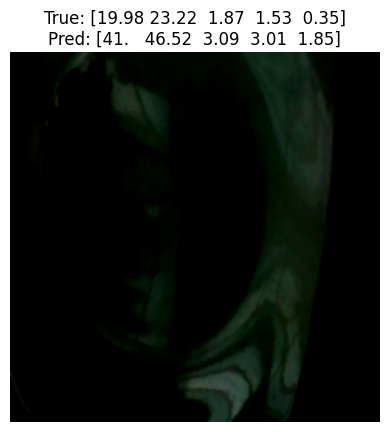

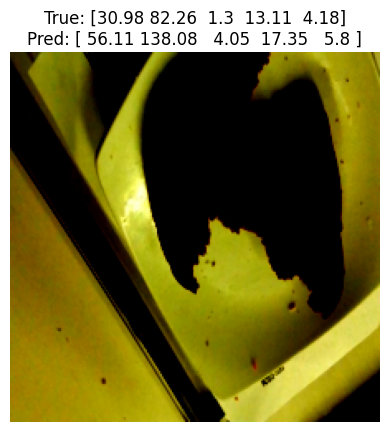

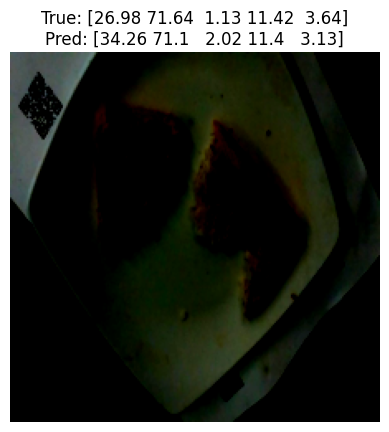

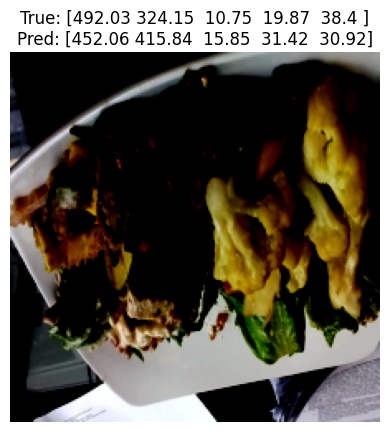

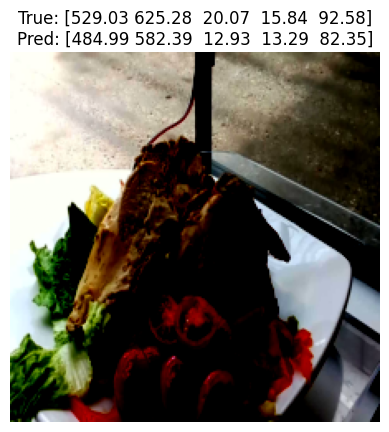

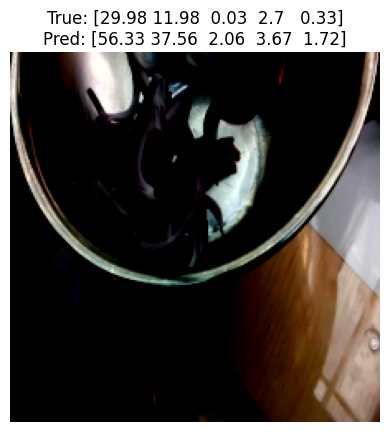

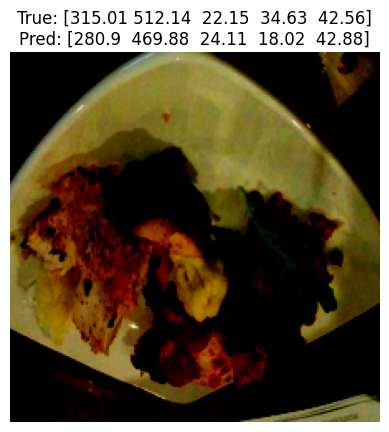

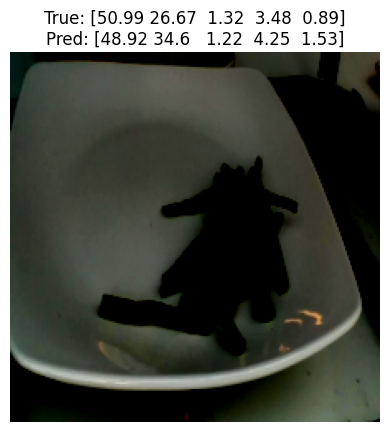

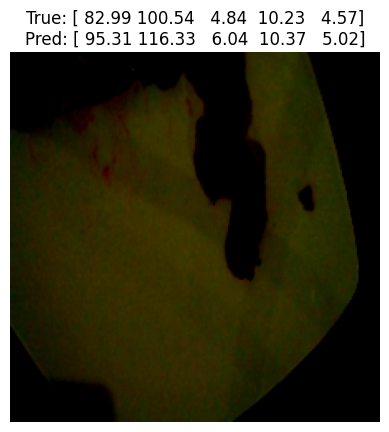

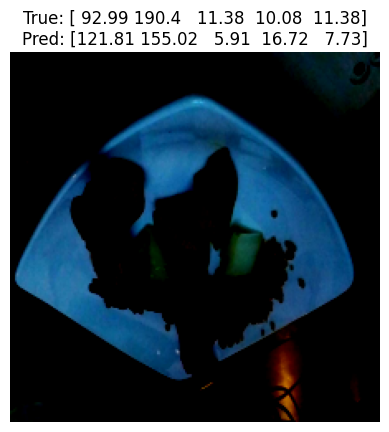

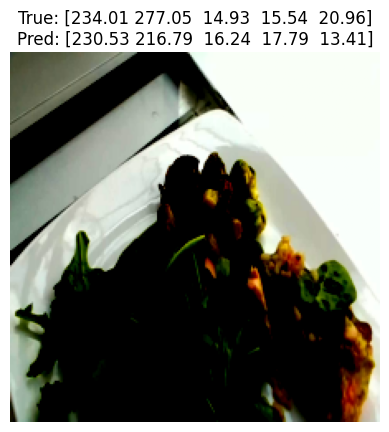

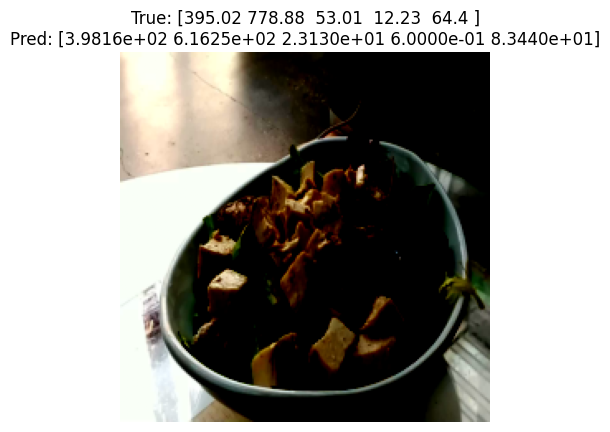

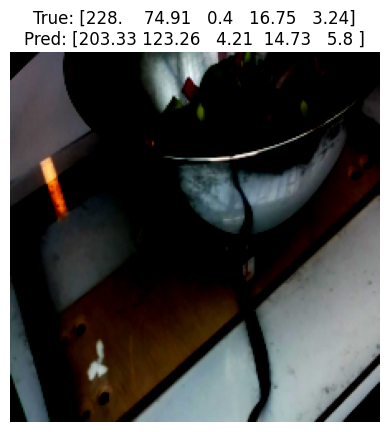

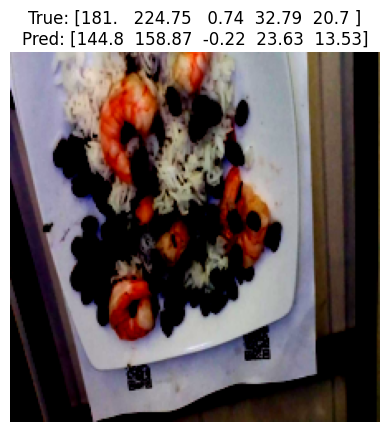

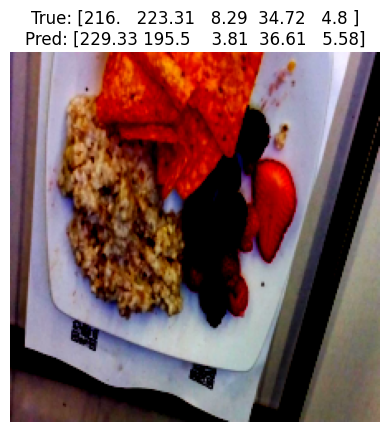

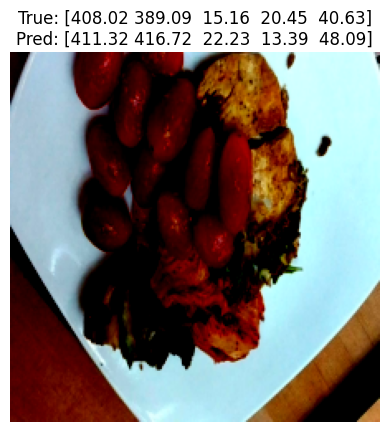

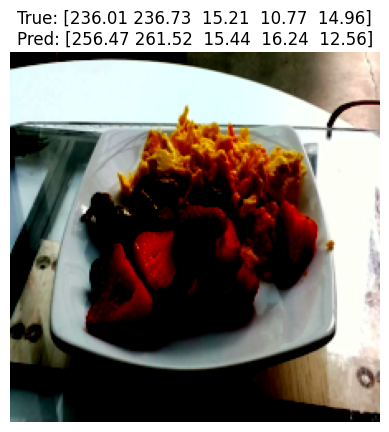

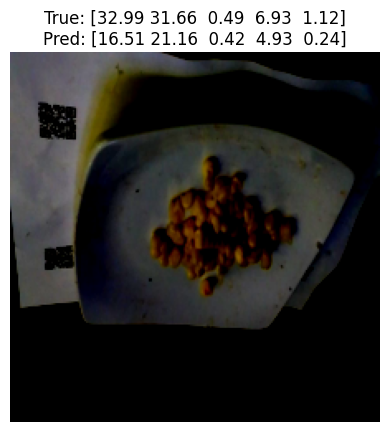

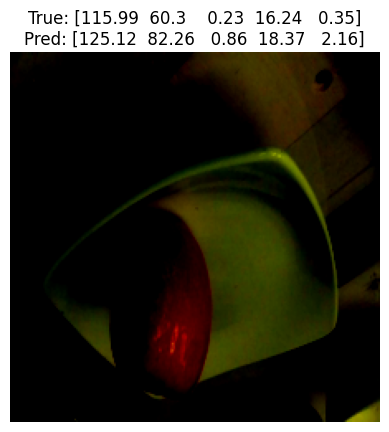

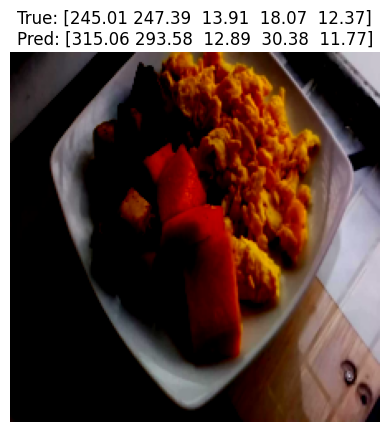

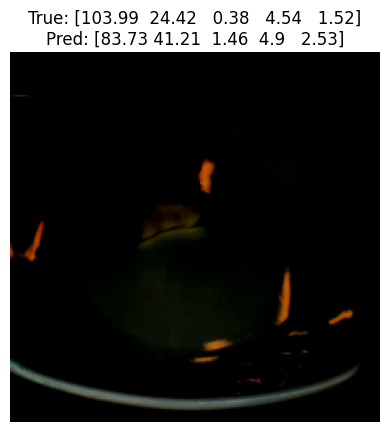

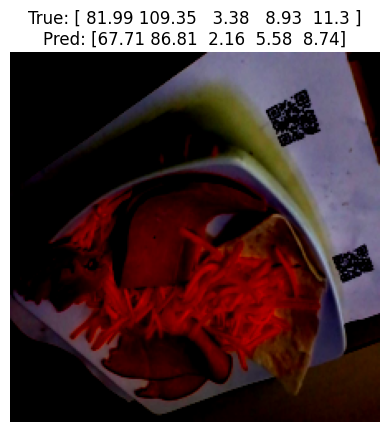

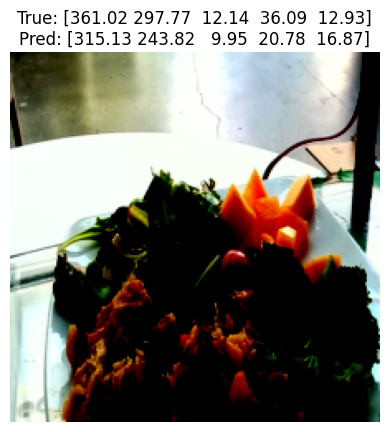

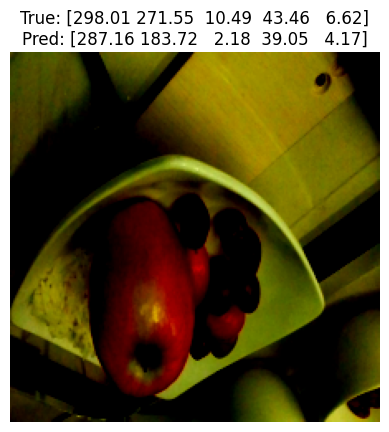

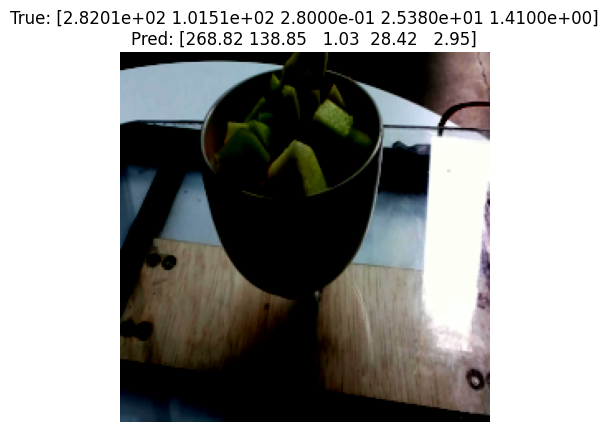

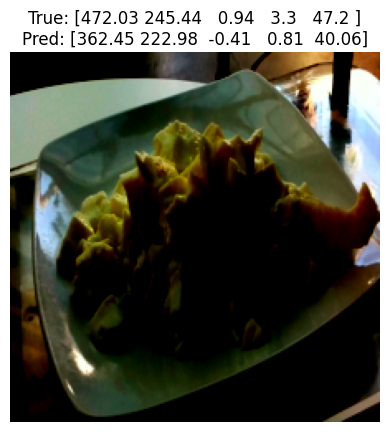

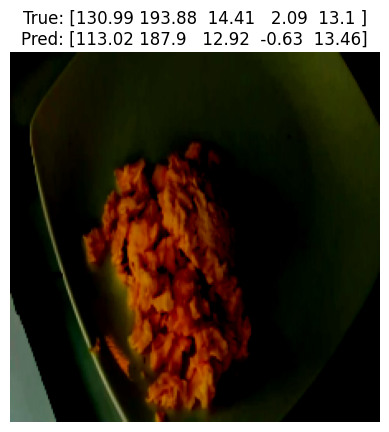

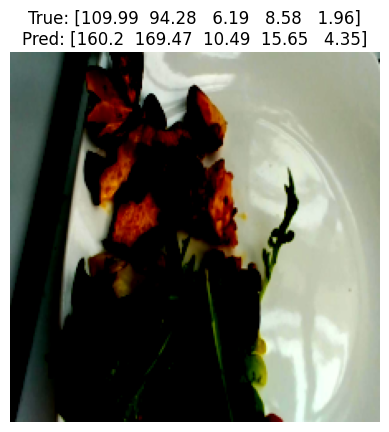

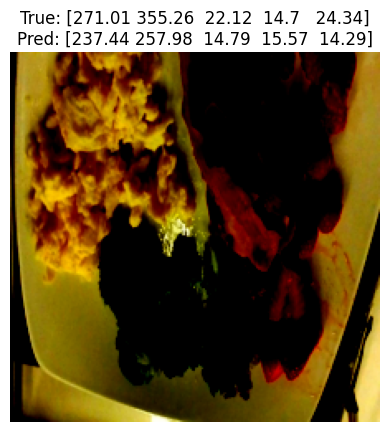

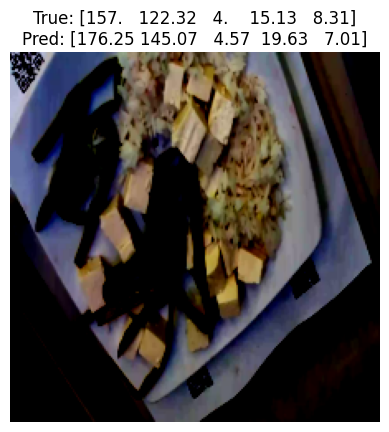

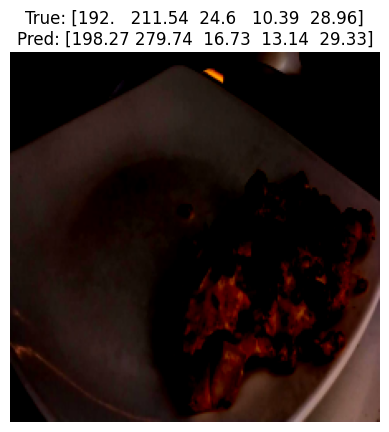

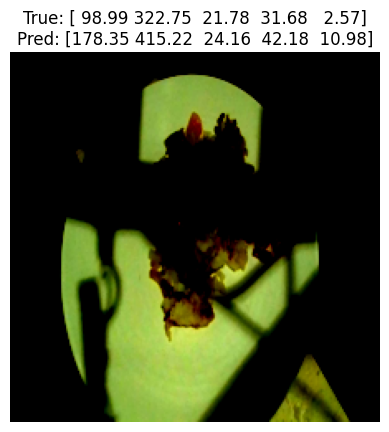

/tmp/ipython-input-183497153.py:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y_original = y * y_std + y_mean
/tmp/ipython-input-183497153.py:11: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y_pred_original = preds * y_std + y_mean


In [ ]:
model_test = Siglip2Regressor()
model_test.to(device)
model_test.load_state_dict(torch.load("/content/checkpoints/model.pth"))
show_val_predictions(model_test, val_data, device, num_samples=32)

In [ ]:
y_mean

array([182.817254  , 217.43218233,  10.88178516,  16.80198885,
        15.04939805])

In [ ]:
from PIL import Image
from torchvision import transforms
import torch

# Load the image
image_path = "/content/elma.jpg"
image = Image.open(image_path).convert("RGB") # Ensure image is in RGB format

# Define the same validation transformations used during training
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Apply transformations and add a batch dimension
input_tensor = val_transform(image).unsqueeze(0)

# Move the input tensor to the same device as the model
device = "cuda" if torch.cuda.is_available() else "cpu"
input_tensor = input_tensor.to(device)

# Ensure the model is in evaluation mode and on the correct device
model_test.eval()
model_test.to(device)

# Get predictions
with torch.no_grad():
    predictions_scaled = model_test(input_tensor)

# Move predictions back to CPU and convert to numpy
predictions_scaled_np = predictions_scaled.cpu().numpy()

# Unscale the predictions using the mean and std calculated earlier
# Assuming y_mean and y_std are available from previous cells
predictions_original = predictions_scaled_np * y_std + y_mean

print(f"Predictions for {image_path} (grams, calories, fat, carb, protein):")
print(predictions_original.round(2))

Predictions for /content/elma.jpg (grams, calories, fat, carb, protein):
[[178.01 112.33   1.65  22.93   5.27]]


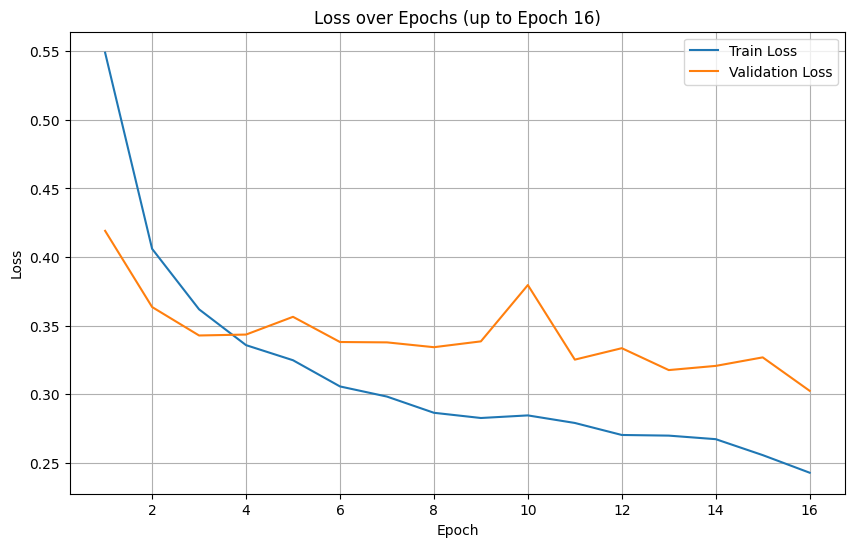

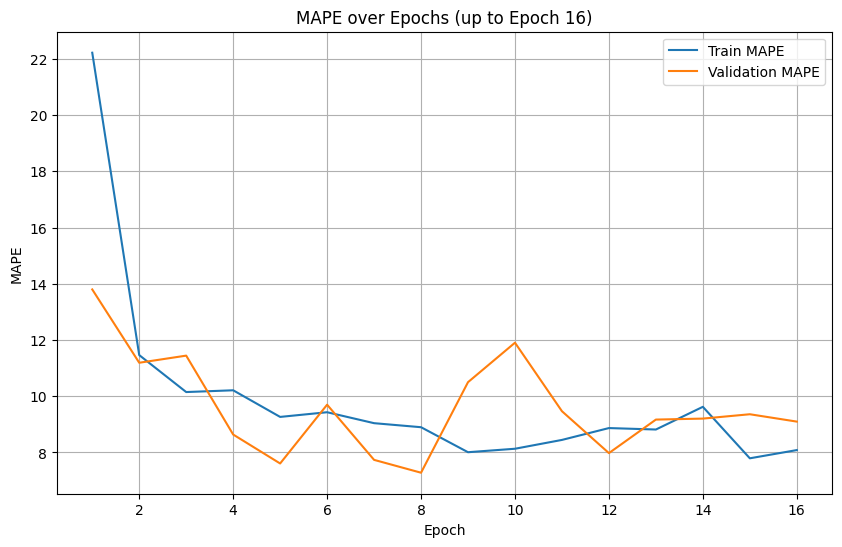

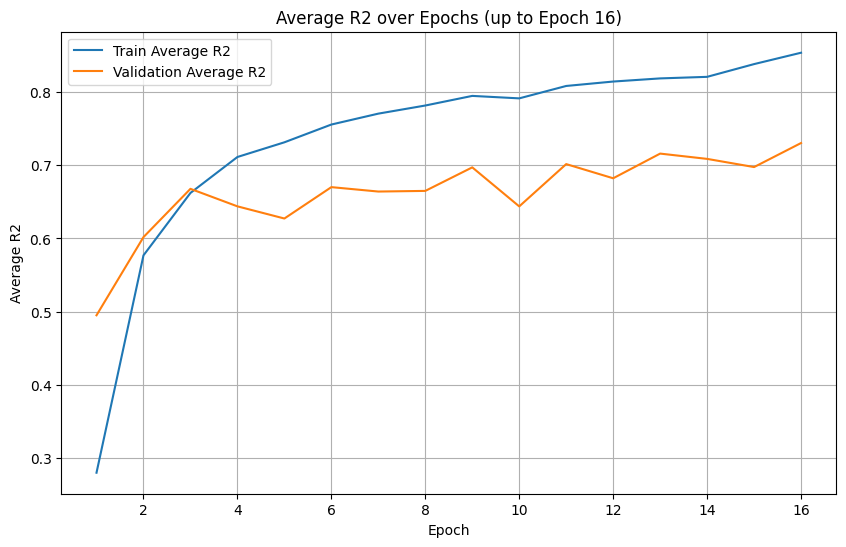

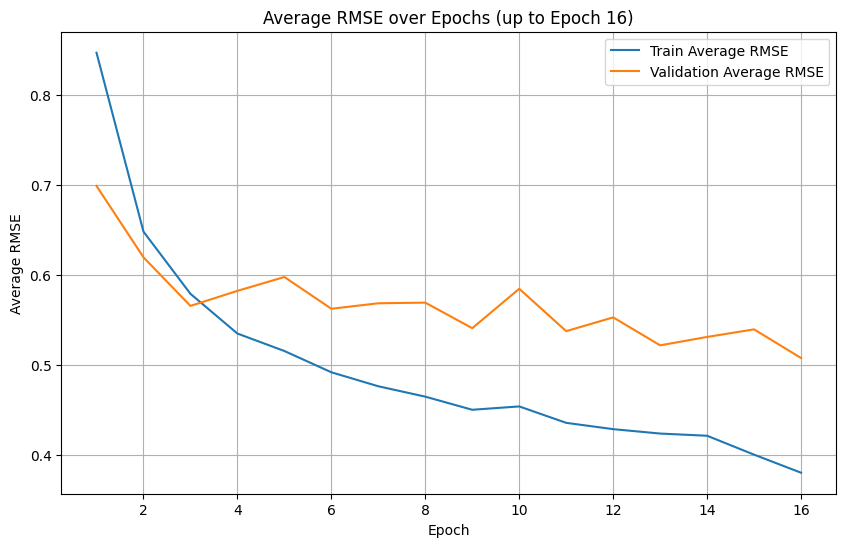

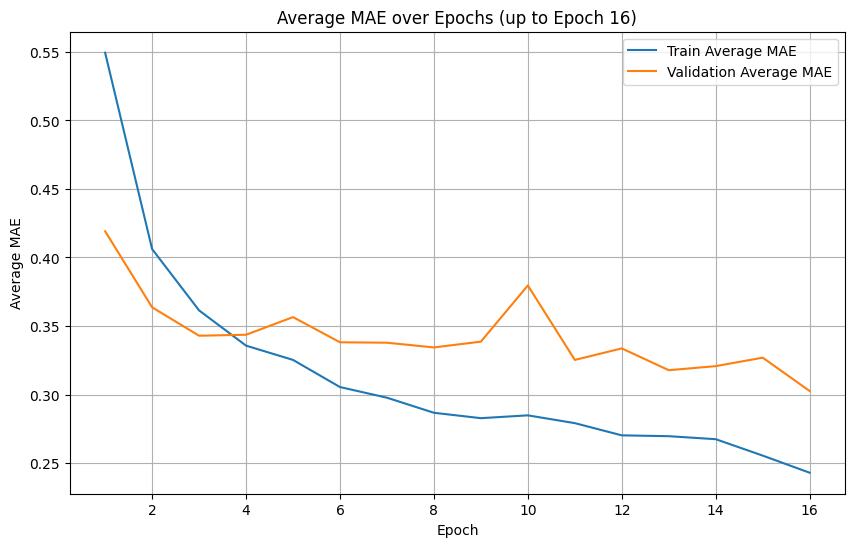

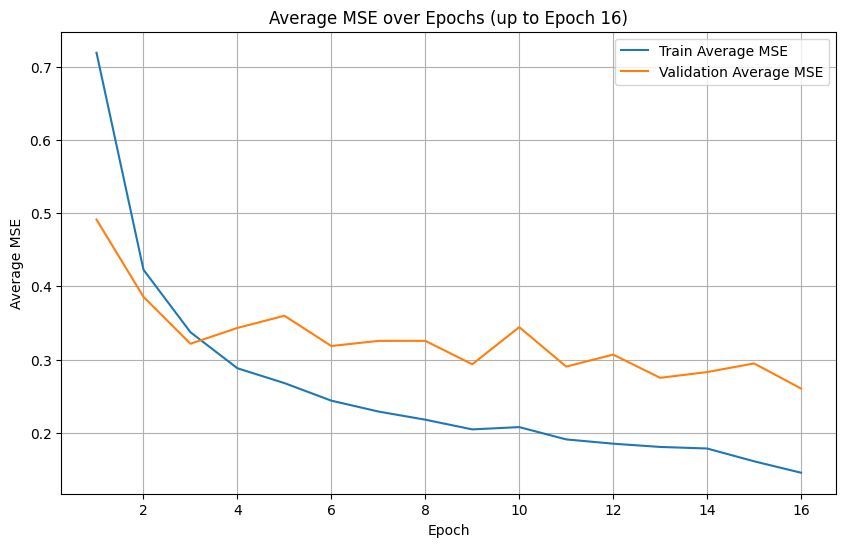

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epochs_to_plot = 16 # Best model'in kaydolduğu epoch

metrics_to_avg = ['r2', 'rmse', 'mae', 'mse']
metrics_to_plot_directly = ['loss', 'mape']

titles = {
    'loss': 'Loss',
    'r2': 'R2',
    'rmse': 'RMSE',
    'mape': 'MAPE',
    'mae': 'MAE',
    'mse': 'MSE'
}


for metric in metrics_to_plot_directly:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs_to_plot + 1), model_results[f'train_{metric}'][:epochs_to_plot], label=f'Train {titles[metric]}')
    plt.plot(range(1, epochs_to_plot + 1), model_results[f'val_{metric}'][:epochs_to_plot], label=f'Validation {titles[metric]}')
    plt.title(f'{titles[metric]} over Epochs (up to Epoch {epochs_to_plot})')
    plt.xlabel('Epoch')
    plt.ylabel(titles[metric])
    plt.legend()
    plt.grid(True)
    plt.show()

for metric in metrics_to_avg:
    train_avg = [np.mean(epoch_values) for epoch_values in model_results[f'train_{metric}']][:epochs_to_plot]
    val_avg = [np.mean(epoch_values) for epoch_values in model_results[f'val_{metric}']][:epochs_to_plot]

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs_to_plot + 1), train_avg, label=f'Train Average {titles[metric]}')
    plt.plot(range(1, epochs_to_plot + 1), val_avg, label=f'Validation Average {titles[metric]}')
    plt.title(f'Average {titles[metric]} over Epochs (up to Epoch {epochs_to_plot})')
    plt.xlabel('Epoch')
    plt.ylabel(f'Average {titles[metric]}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the source file path and the destination path in Google Drive
source_path = "/content/checkpoints/model.pth"
destination_path = "/content/drive/My Drive/new_model.pth" # You can change the destination path and filename here

# Check if the source file exists
if os.path.exists(source_path):
    # Copy the file
    !cp "{source_path}" "{destination_path}"
    print(f"Successfully copied '{os.path.basename(source_path)}' to '{destination_path}'")
else:
    print(f"Source file not found at '{source_path}'")

Successfully copied 'model.pth' to '/content/drive/My Drive/new_model.pth'
